# Importar bibliotecas

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ROCAUC
from sklearn.cluster import KMeans

C:\Users\yukar\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\yukar\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [230]:
rain = pd.read_csv('data/rain_data_aus.csv')

In [232]:
rain

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,...,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,71.0,22.0,1007.7,...,16.9,21.8,No,0.0,No,29.48,28.400000,12,5.115360,0.089825
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,44.0,25.0,1010.6,...,17.2,24.3,No,0.0,No,32.12,2.208569,10,21.497100,0.023477
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,38.0,30.0,1007.6,...,21.0,23.2,No,0.0,No,32.84,38.000000,17,20.782859,0.027580
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,45.0,16.0,1017.6,...,18.1,26.5,No,1.0,No,35.60,21.200000,8,12.028646,0.023962
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,82.0,33.0,1010.8,...,17.8,29.7,No,0.2,No,40.76,41.600000,9,11.883546,0.220164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,59.0,27.0,1024.7,...,9.4,20.9,No,0.0,No,28.16,34.400000,12,5.848681,0.002556
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,51.0,24.0,1024.6,...,10.1,22.4,No,0.0,No,30.08,30.800000,10,6.653879,0.002053
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,56.0,21.0,1023.5,...,10.9,24.5,No,0.0,No,32.36,27.200000,9,19.715976,0.023350
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,53.0,24.0,1021.0,...,12.5,26.1,No,0.0,No,34.28,30.800000,12,0.985551,0.007195


In [231]:
rain.isna().sum()

date                    0
location                0
mintemp               637
maxtemp               322
rainfall             1406
evaporation         60843
sunshine            67816
humidity9am          1774
humidity3pm          3610
pressure9am         14014
pressure3pm         13981
cloud9am            53657
cloud3pm            57094
temp9am               904
temp3pm              2726
raintoday            1406
amountOfRain            0
raintomorrow            0
temp                  322
humidity             3610
precipitation3pm        0
precipitation9am        0
modelo_vigente          0
dtype: int64

Dropando NaN

In [233]:
rain = rain.dropna()

In [234]:
rain

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,...,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente
5939,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,20.0,13.0,1006.3,...,26.6,33.4,No,0.0,No,44.24,17.6,5,15.165784,0.011320
5940,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,30.0,8.0,1012.9,...,20.3,27.0,No,0.0,No,36.68,11.6,9,9.750834,0.001683
5942,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,42.0,22.0,1012.3,...,28.7,34.9,No,0.0,No,47.12,28.4,11,5.557986,0.061026
5943,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,37.0,22.0,1012.7,...,29.1,35.6,No,0.0,No,48.08,28.4,10,17.820001,0.010724
5944,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,19.0,15.0,1010.7,...,33.6,37.6,No,0.0,No,51.20,20.0,9,13.217116,0.103292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139108,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,63.0,32.0,1013.9,...,24.5,32.3,No,0.0,No,42.08,40.4,7,15.000004,0.008671
139109,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,56.0,28.0,1014.6,...,24.8,32.0,No,0.0,No,41.12,35.6,12,3.721395,0.052358
139110,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,46.0,23.0,1015.3,...,24.8,32.1,No,0.0,No,41.36,29.6,10,18.462662,0.005346
139111,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,62.0,58.0,1014.9,...,24.8,29.2,No,0.0,No,40.16,71.6,6,16.343690,0.025044


Colocando em numéricas se choveu/choverá ou não.

In [166]:
rain['raintoday'] = rain['raintoday'].replace('No', 0).replace('Yes', 1)

In [167]:
rain['raintomorrow'] = rain['raintomorrow'].replace('No', 0).replace('Yes', 1)

Verificar correlação entre as variáveis.

In [6]:
rain.corr().style.background_gradient(cmap='coolwarm')

,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente
mintemp,1.000000,0.743674,0.110846,0.510004,0.070680,-0.177758,0.076333,-0.475451,-0.491435,0.115204,0.050917,0.905552,0.720796,0.051478,0.142911,0.088964,0.578773,0.068579,0.003508,-0.001382,0.135744
maxtemp,0.743674,1.000000,-0.069482,0.652247,0.461698,-0.496329,-0.448043,-0.355855,-0.454047,-0.262003,-0.253183,0.890743,0.984101,-0.220012,-0.015487,-0.144498,0.779778,-0.406402,0.003385,-0.001055,-0.212616
rainfall,0.110846,-0.069482,1.000000,-0.074049,-0.243738,0.258127,0.270421,-0.177673,-0.133452,0.215699,0.191743,0.014438,-0.073640,0.553481,0.302723,0.253773,-0.060093,0.247128,-0.007556,-0.003066,0.371184
evaporation,0.510004,0.652247,-0.074049,1.000000,0.366577,-0.554104,-0.414895,-0.304406,-0.330799,-0.192775,-0.196180,0.598609,0.631686,-0.213291,-0.042126,-0.127257,0.509947,-0.375537,0.007043,-0.000189,-0.183537
sunshine,0.070680,0.461698,-0.243738,0.366577,1.000000,-0.498855,-0.622767,0.035783,-0.027949,-0.678801,-0.704871,0.285678,0.483256,-0.327720,-0.298182,-0.449261,0.359295,-0.565134,-0.003376,0.004404,-0.643104
humidity9am,-0.177758,-0.496329,0.258127,-0.554104,-0.498855,1.000000,0.679847,0.122421,0.178441,0.432826,0.344565,-0.426737,-0.487789,0.371288,0.177473,0.265360,-0.388460,0.617538,-0.003913,-0.001670,0.392692
humidity3pm,0.076333,-0.448043,0.270421,-0.414895,-0.622767,0.679847,1.000000,-0.057837,0.028653,0.507677,0.507461,-0.148491,-0.498921,0.376480,0.309910,0.447742,-0.351533,0.907959,-0.003120,-0.003777,0.644851
pressure9am,-0.475451,-0.355855,-0.177673,-0.304406,0.035783,0.122421,-0.057837,1.000000,0.961926,-0.142788,-0.164998,-0.447688,-0.314549,-0.183468,-0.174923,-0.255934,-0.274905,-0.052670,-0.002484,0.003967,-0.371539
pressure3pm,-0.491435,-0.454047,-0.133452,-0.330799,-0.027949,0.178441,0.028653,0.961926,1.000000,-0.074193,-0.101631,-0.500713,-0.422233,-0.100839,-0.174031,-0.231428,-0.351972,0.025834,-0.002560,0.004046,-0.322904
cloud9am,0.115204,-0.262003,0.215699,-0.192775,-0.678801,0.432826,0.507677,-0.142788,-0.074193,1.000000,0.612633,-0.101916,-0.278856,0.297414,0.204768,0.319410,-0.203947,0.460164,-0.000451,-0.000973,0.473697


Dropando as colunas pois deu overfitting com elas.

In [148]:
wind_1 = pd.read_csv('data/wind_table_01.csv')
wind_2 = pd.read_csv('data/wind_table_02.csv')
wind_3 = pd.read_csv('data/wind_table_03.csv')
wind_4 = pd.read_csv('data/wind_table_04.csv')
wind_5 = pd.read_csv('data/wind_table_05.csv')
wind_6 = pd.read_csv('data/wind_table_06.csv')
wind_7 = pd.read_csv('data/wind_table_07.csv')
wind_8 = pd.read_csv('data/wind_table_08.csv')

In [158]:
wind_1.columns = wind_3.columns

In [159]:
wind_2.columns = wind_3.columns

In [160]:
wind = wind_1.append(wind_2, ignore_index=True).append(wind_3, ignore_index=True).append(wind_3, ignore_index=True).append(wind_4, ignore_index=True).append(wind_5, ignore_index=True).append(wind_6, ignore_index=True).append(wind_7, ignore_index=True).append(wind_8, ignore_index=True)

In [161]:
wind.head()

,date,location,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm
0,2007-11-01,Canberra,NW,30.0,SW,NW,6.0,20.0
1,2007-11-02,Canberra,ENE,39.0,E,W,4.0,17.0
2,2007-11-03,Canberra,NW,85.0,N,NNE,6.0,6.0
3,2007-11-04,Canberra,NW,54.0,WNW,W,30.0,24.0
4,2007-11-05,Canberra,SSE,50.0,SSE,ESE,20.0,28.0


# Regressão Logistica

In [10]:
X = rain[[ 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm',
       'cloud9am', 'cloud3pm', 'temp9am', 'temp3pm', 'raintoday',
       'temp', 'humidity', 'precipitation3pm','modelo_vigente', 'amountOfRain',
       'precipitation9am']]
y = rain['raintomorrow']
model = LogisticRegression()
model.fit(X,y)

C:\Users\yukar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
model.score(X, y)

0.9947188216673665

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=7)

In [13]:
model.fit(X_train, y_train)

C:\Users\yukar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
model.score(X_test, y_test)

0.9755162686535025

In [15]:
model.score(X_train, y_train)

0.9755152141611215

Deu overfitting... Quais colunas tirar ?

In [16]:
rain.corr().style.background_gradient(cmap='coolwarm')

,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente
mintemp,1.000000,0.743674,0.110846,0.510004,0.070680,-0.177758,0.076333,-0.475451,-0.491435,0.115204,0.050917,0.905552,0.720796,0.051478,0.142911,0.088964,0.578773,0.068579,0.003508,-0.001382,0.135744
maxtemp,0.743674,1.000000,-0.069482,0.652247,0.461698,-0.496329,-0.448043,-0.355855,-0.454047,-0.262003,-0.253183,0.890743,0.984101,-0.220012,-0.015487,-0.144498,0.779778,-0.406402,0.003385,-0.001055,-0.212616
rainfall,0.110846,-0.069482,1.000000,-0.074049,-0.243738,0.258127,0.270421,-0.177673,-0.133452,0.215699,0.191743,0.014438,-0.073640,0.553481,0.302723,0.253773,-0.060093,0.247128,-0.007556,-0.003066,0.371184
evaporation,0.510004,0.652247,-0.074049,1.000000,0.366577,-0.554104,-0.414895,-0.304406,-0.330799,-0.192775,-0.196180,0.598609,0.631686,-0.213291,-0.042126,-0.127257,0.509947,-0.375537,0.007043,-0.000189,-0.183537
sunshine,0.070680,0.461698,-0.243738,0.366577,1.000000,-0.498855,-0.622767,0.035783,-0.027949,-0.678801,-0.704871,0.285678,0.483256,-0.327720,-0.298182,-0.449261,0.359295,-0.565134,-0.003376,0.004404,-0.643104
humidity9am,-0.177758,-0.496329,0.258127,-0.554104,-0.498855,1.000000,0.679847,0.122421,0.178441,0.432826,0.344565,-0.426737,-0.487789,0.371288,0.177473,0.265360,-0.388460,0.617538,-0.003913,-0.001670,0.392692
humidity3pm,0.076333,-0.448043,0.270421,-0.414895,-0.622767,0.679847,1.000000,-0.057837,0.028653,0.507677,0.507461,-0.148491,-0.498921,0.376480,0.309910,0.447742,-0.351533,0.907959,-0.003120,-0.003777,0.644851
pressure9am,-0.475451,-0.355855,-0.177673,-0.304406,0.035783,0.122421,-0.057837,1.000000,0.961926,-0.142788,-0.164998,-0.447688,-0.314549,-0.183468,-0.174923,-0.255934,-0.274905,-0.052670,-0.002484,0.003967,-0.371539
pressure3pm,-0.491435,-0.454047,-0.133452,-0.330799,-0.027949,0.178441,0.028653,0.961926,1.000000,-0.074193,-0.101631,-0.500713,-0.422233,-0.100839,-0.174031,-0.231428,-0.351972,0.025834,-0.002560,0.004046,-0.322904
cloud9am,0.115204,-0.262003,0.215699,-0.192775,-0.678801,0.432826,0.507677,-0.142788,-0.074193,1.000000,0.612633,-0.101916,-0.278856,0.297414,0.204768,0.319410,-0.203947,0.460164,-0.000451,-0.000973,0.473697


In [17]:
mask = rain['amountOfRain'] != 0
rain[mask]

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,...,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente
5957,2009-01-19,Cobar,21.4,37.5,0.0,14.8,6.9,34.0,29.0,1013.1,...,26.2,34.1,0,4.8,1,47.000000,36.8,12,4.800715,0.508444
5960,2009-01-22,Cobar,21.8,30.7,0.0,8.0,5.9,71.0,63.0,1008.6,...,24.4,27.3,0,18.0,1,38.840000,77.6,14,17.000266,0.668741
5961,2009-01-23,Cobar,20.3,36.0,18.0,8.2,10.5,89.0,50.0,1008.6,...,24.7,33.4,1,8.6,1,2.885476,62.0,13,22.201948,0.565887
5971,2009-02-02,Cobar,27.6,40.3,0.0,14.4,10.9,32.0,20.0,1010.4,...,32.0,38.5,0,0.6,0,50.360000,26.0,12,6.331012,0.077857
5972,2009-02-03,Cobar,23.6,40.4,0.6,11.8,12.2,42.0,17.0,1008.4,...,29.9,38.7,0,1.6,1,50.480000,22.4,15,19.546120,0.444288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139046,2017-04-19,Darwin,25.2,33.5,0.0,4.8,11.2,70.0,46.0,1013.1,...,28.9,33.1,0,1.8,1,42.200000,57.2,11,8.607460,0.105326
139053,2017-04-26,Darwin,25.4,29.2,0.0,5.4,0.0,72.0,66.0,1011.0,...,26.8,28.9,0,0.2,0,37.040000,81.2,16,14.014132,0.525196
139054,2017-04-27,Darwin,24.4,27.4,0.2,2.2,0.0,73.0,86.0,1011.4,...,25.5,25.9,0,3.4,1,34.880000,105.2,13,11.585576,0.888070
139076,2017-05-19,Darwin,23.5,34.7,0.0,5.0,11.2,64.0,28.0,1011.9,...,27.2,33.5,0,0.2,0,2.163095,35.6,19,16.722569,0.017473


Vamos ter que tirar o Amount of Rain e o Modelo Vigente,pois está diretamente relacionado ao overfitting.

In [18]:
X = rain[[ 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm',
       'cloud9am', 'cloud3pm', 'temp9am', 'temp3pm', 'raintoday',
       'temp', 'humidity', 'precipitation3pm','precipitation9am']]
y = rain['raintomorrow']
model = LogisticRegression(max_iter=1000)
model.fit(X,y)

C:\Users\yukar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
model.score(X, y)

0.8373170968054524

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=7)
model.score(X_test, y_test)

0.8377656710954154

In [22]:
model.score(X_train, y_train)

0.8359713159764842

In [23]:
confusion_matrix(y_test, model.predict(X_test))

array([[34059,  2065],
       [ 5469,  4846]], dtype=int64)

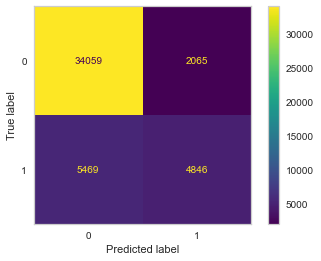

In [24]:
plot_confusion_matrix(model, X_test, y_test, values_format='.0f')
plt.grid(False)

Taxa de acerto está quanto ?

In [25]:
precision_score(y, model.predict(X))

0.7026997723083596

E a taxa de captura ?

In [26]:
recall_score(y, model.predict(X))

0.4692296553721402

### Que tal aumentar a taxa de acertos ?

In [27]:
y_pred = model.predict_proba(X)[:, 1] > 0.8

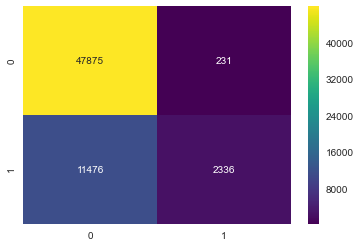

In [28]:
sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap='viridis', fmt="d", annot_kws={'verticalalignment':'top'})
# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom + 0.5, top - 0.5)

Taxa de acerto está em quanto ?

In [29]:
precision_score(y, y_pred)

0.9100116867939229

E a taxa de captura ?

In [30]:
recall_score(y, y_pred)

0.16912829423689546

### E se diminuir a taxa de acertos ?

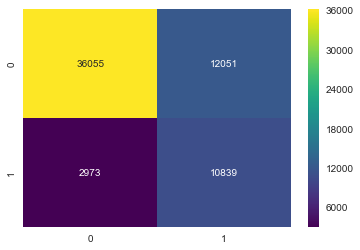

In [31]:
y_pred = model.predict_proba(X)[:, 1] > 0.2
sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap='viridis', fmt="d")

Taxa de acerto está em quanto ?

In [32]:
precision_score(y, y_pred)

0.47352555701179555

E a taxa de captura ?

In [33]:
recall_score(y, y_pred)

0.7847523892267594

Se quer aumentar a taxa de acerto, a taxa de captura diminui.

Se quiser aumentar a taxa de captura, a taxa de acerto diminui.

### Mesclar as duas planilhas pra ver no que pode dar ?

In [168]:
rain.head()

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,...,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente
5939,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,20.0,13.0,1006.3,...,26.6,33.4,0,0.0,0,44.24,17.6,5,15.165784,0.011320
5940,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,30.0,8.0,1012.9,...,20.3,27.0,0,0.0,0,36.68,11.6,9,9.750834,0.001683
5942,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,42.0,22.0,1012.3,...,28.7,34.9,0,0.0,0,47.12,28.4,11,5.557986,0.061026
5943,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,37.0,22.0,1012.7,...,29.1,35.6,0,0.0,0,48.08,28.4,10,17.820001,0.010724
5944,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,19.0,15.0,1010.7,...,33.6,37.6,0,0.0,0,51.20,20.0,9,13.217116,0.103292


In [169]:
wind.head()

,date,location,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm
0,2007-11-01,Canberra,NW,30.0,SW,NW,6.0,20.0
1,2007-11-02,Canberra,ENE,39.0,E,W,4.0,17.0
2,2007-11-03,Canberra,NW,85.0,N,NNE,6.0,6.0
3,2007-11-04,Canberra,NW,54.0,WNW,W,30.0,24.0
4,2007-11-05,Canberra,SSE,50.0,SSE,ESE,20.0,28.0


In [170]:
df = pd.merge(rain, wind, on=['date','location'], how='inner').drop(columns=['date', 'location']).fillna(0)

In [171]:
df

,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,...,humidity,precipitation3pm,precipitation9am,modelo_vigente,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm
0,17.9,35.2,0.0,12.0,12.3,20.0,13.0,1006.3,1004.4,2.0,...,17.6,5,15.165784,0.011320,SSW,48.0,ENE,SW,6.0,20.0
1,18.4,28.9,0.0,14.8,13.0,30.0,8.0,1012.9,1012.1,1.0,...,11.6,9,9.750834,0.001683,S,37.0,SSE,SSE,19.0,19.0
2,19.4,37.6,0.0,10.8,10.6,42.0,22.0,1012.3,1009.2,1.0,...,28.4,11,5.557986,0.061026,NNE,46.0,NNE,NNW,30.0,15.0
3,21.9,38.4,0.0,11.4,12.2,37.0,22.0,1012.7,1009.1,1.0,...,28.4,10,17.820001,0.010724,WNW,31.0,WNW,WSW,6.0,6.0
4,24.2,41.0,0.0,11.2,8.4,19.0,15.0,1010.7,1007.4,1.0,...,20.0,9,13.217116,0.103292,WNW,35.0,NW,WNW,17.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76326,20.7,32.8,0.0,5.6,11.0,46.0,23.0,1015.3,1011.8,0.0,...,29.6,10,18.462662,0.005346,E,33.0,E,W,17.0,11.0
76327,19.5,31.8,0.0,6.2,10.6,62.0,58.0,1014.9,1010.7,1.0,...,71.6,6,16.343690,0.025044,ESE,26.0,SE,NNW,9.0,17.0
76328,19.5,31.8,0.0,6.2,10.6,62.0,58.0,1014.9,1010.7,1.0,...,71.6,6,16.343690,0.025044,ESE,26.0,SE,NNW,9.0,17.0
76329,20.2,31.7,0.0,5.6,10.7,73.0,32.0,1013.9,1009.7,6.0,...,40.4,12,9.187054,0.043525,ENE,30.0,ENE,NNW,15.0,7.0


In [173]:
df.corr().style.background_gradient(cmap='coolwarm')

,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente,windgustspeed,windspeed9am,windspeed3pm
mintemp,1.000000,0.744963,0.112258,0.513889,0.073537,-0.179831,0.078182,-0.480673,-0.496758,0.119674,0.053384,0.906341,0.721428,0.053725,0.144274,0.090184,0.580345,0.069382,0.003525,-0.003136,0.137804,0.110181,0.133499,0.151629
maxtemp,0.744963,1.000000,-0.069015,0.652686,0.464788,-0.491909,-0.443110,-0.357359,-0.454981,-0.255837,-0.251703,0.891609,0.984136,-0.220556,-0.013611,-0.143926,0.779257,-0.400552,0.002480,-0.001984,-0.213329,0.093681,0.014134,0.034568
rainfall,0.112258,-0.069015,1.000000,-0.068708,-0.241649,0.256477,0.270101,-0.178667,-0.133761,0.214919,0.190688,0.015919,-0.073522,0.552281,0.294348,0.251240,-0.059166,0.246089,-0.006229,-0.005453,0.370698,0.079747,0.054783,0.043309
evaporation,0.513889,0.652686,-0.068708,1.000000,0.365082,-0.551417,-0.406220,-0.311668,-0.337509,-0.183835,-0.189060,0.602597,0.630967,-0.210018,-0.038867,-0.122074,0.510150,-0.366319,0.007464,-0.002211,-0.177678,0.214257,0.209775,0.147977
sunshine,0.073537,0.464788,-0.241649,0.365082,1.000000,-0.497398,-0.623921,0.034130,-0.029303,-0.678056,-0.702989,0.288031,0.486317,-0.327920,-0.297257,-0.447219,0.360156,-0.564051,-0.003318,0.003598,-0.642991,-0.004859,0.000040,0.053092
humidity9am,-0.179831,-0.491909,0.256477,-0.551417,-0.497398,1.000000,0.673704,0.123405,0.178417,0.426740,0.339399,-0.426105,-0.483099,0.370972,0.173860,0.261189,-0.383908,0.609630,-0.003939,-0.000907,0.389984,-0.203907,-0.260129,-0.126862
humidity3pm,0.078182,-0.443110,0.270101,-0.406220,-0.623921,0.673704,1.000000,-0.060207,0.025078,0.504790,0.507618,-0.145790,-0.494355,0.378750,0.310742,0.448535,-0.346132,0.904377,-0.003885,-0.004239,0.648697,-0.115335,-0.068579,0.012988
pressure9am,-0.480673,-0.357359,-0.178667,-0.311668,0.034130,0.123405,-0.060207,1.000000,0.962535,-0.147139,-0.166719,-0.451210,-0.315560,-0.187691,-0.174773,-0.256811,-0.275864,-0.054589,-0.001604,0.004864,-0.375197,-0.353658,-0.209105,-0.290952
pressure3pm,-0.496758,-0.454981,-0.133761,-0.337509,-0.029303,0.178417,0.025078,0.962535,1.000000,-0.079871,-0.104344,-0.503986,-0.422675,-0.104782,-0.174373,-0.233041,-0.352392,0.022584,-0.001568,0.004976,-0.326822,-0.326207,-0.162330,-0.251824
cloud9am,0.119674,-0.255837,0.214919,-0.183835,-0.678056,0.426740,0.504790,-0.147139,-0.079871,1.000000,0.610714,-0.096273,-0.273238,0.295876,0.204768,0.320003,-0.197857,0.455517,0.000718,-0.000589,0.475395,0.043460,0.031130,0.056301


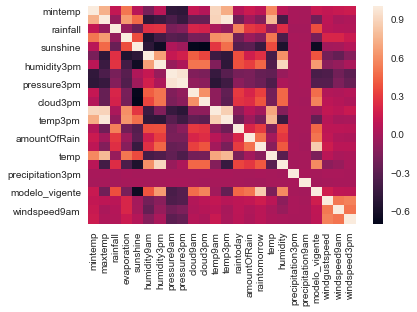

In [172]:
sns.heatmap(df.corr())

In [121]:
X = df[['wind_gustspeed','wind_speed9am', 'wind_speed3pm',
       'windgustspeed', 'windspeed9am','windspeed3pm']]
y = df['raintomorrow']
model = LogisticRegression()
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [122]:
model.score(X, y)

0.7751896346176521

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=7)
model.score(X_test, y_test)

0.7763454383482681

In [124]:
model.score(X_train, y_train)

0.7717220417147049

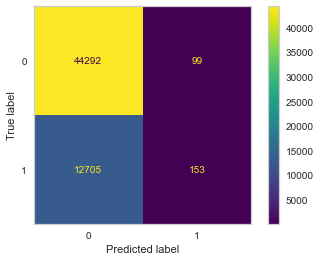

In [125]:
plot_confusion_matrix(model, X_test, y_test, values_format='.0f')
plt.grid(False)

A taxa de acerto, está quanto ?

In [126]:
precision_score(y, model.predict(X))

0.5953079178885631

E a taxa de captura ?

In [127]:
recall_score(y, model.predict(X))

0.011785195936139333

In [174]:
dfd = pd.get_dummies(df)

In [176]:
dfd.columns

Index(['mintemp', 'maxtemp', 'rainfall', 'evaporation', 'sunshine',
       'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm', 'cloud9am',
       'cloud3pm', 'temp9am', 'temp3pm', 'raintoday', 'amountOfRain',
       'raintomorrow', 'temp', 'humidity', 'precipitation3pm',
       'precipitation9am', 'modelo_vigente', 'windgustspeed', 'windspeed9am',
       'windspeed3pm', 'windgustdir_0', 'windgustdir_E', 'windgustdir_ENE',
       'windgustdir_ESE', 'windgustdir_N', 'windgustdir_NE', 'windgustdir_NNE',
       'windgustdir_NNW', 'windgustdir_NW', 'windgustdir_S', 'windgustdir_SE',
       'windgustdir_SSE', 'windgustdir_SSW', 'windgustdir_SW', 'windgustdir_W',
       'windgustdir_WNW', 'windgustdir_WSW', 'winddir9am_0', 'winddir9am_E',
       'winddir9am_ENE', 'winddir9am_ESE', 'winddir9am_N', 'winddir9am_NE',
       'winddir9am_NNE', 'winddir9am_NNW', 'winddir9am_NW', 'winddir9am_S',
       'winddir9am_SE', 'winddir9am_SSE', 'winddir9am_SSW', 'winddir9am_SW',
       'winddir9am_W'

In [178]:
X = dfd[['mintemp', 'maxtemp', 'rainfall', 'evaporation', 'sunshine',
       'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm', 'cloud9am',
       'cloud3pm', 'temp9am', 'temp3pm', 'raintoday',
       'temp', 'humidity', 'precipitation3pm',
       'precipitation9am', 'windgustspeed', 'windspeed9am',
       'windspeed3pm', 'windgustdir_0', 'windgustdir_E', 'windgustdir_ENE',
       'windgustdir_ESE', 'windgustdir_N', 'windgustdir_NE', 'windgustdir_NNE',
       'windgustdir_NNW', 'windgustdir_NW', 'windgustdir_S', 'windgustdir_SE',
       'windgustdir_SSE', 'windgustdir_SSW', 'windgustdir_SW', 'windgustdir_W',
       'windgustdir_WNW', 'windgustdir_WSW', 'winddir9am_0', 'winddir9am_E',
       'winddir9am_ENE', 'winddir9am_ESE', 'winddir9am_N', 'winddir9am_NE',
       'winddir9am_NNE', 'winddir9am_NNW', 'winddir9am_NW', 'winddir9am_S',
       'winddir9am_SE', 'winddir9am_SSE', 'winddir9am_SSW', 'winddir9am_SW',
       'winddir9am_W', 'winddir9am_WNW', 'winddir9am_WSW', 'winddir3pm_0',
       'winddir3pm_E', 'winddir3pm_ENE', 'winddir3pm_ESE', 'winddir3pm_N',
       'winddir3pm_NE', 'winddir3pm_NNE', 'winddir3pm_NNW', 'winddir3pm_NW',
       'winddir3pm_S', 'winddir3pm_SE', 'winddir3pm_SSE', 'winddir3pm_SSW',
       'winddir3pm_SW', 'winddir3pm_W', 'winddir3pm_WNW', 'winddir3pm_WSW']]
y = dfd['raintomorrow']
model = LogisticRegression()
model.fit(X,y)

C:\Users\yukar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [179]:
model.score(X, y)

0.8401304843379492

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=7)
model.score(X_test, y_test)

0.8407483100141487

In [181]:
model.score(X_train, y_train)

0.8382769101771302

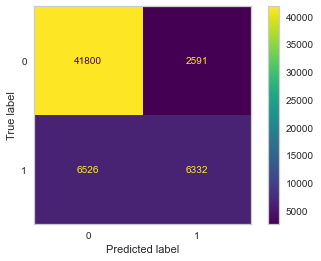

In [182]:
plot_confusion_matrix(model, X_test, y_test, values_format='.0f')
plt.grid(False)

In [183]:
from sklearn.cluster import KMeans

In [184]:
from yellowbrick.cluster import KElbowVisualizer

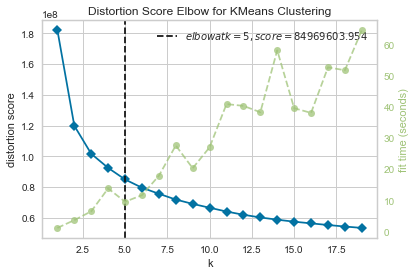

In [185]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20))
visualizer.fit(dfd)
visualizer.show()

In [186]:
model = KMeans(n_clusters=5)

In [189]:
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [192]:
dfd['labels'] = model.labels_

In [204]:
modelo = LogisticRegression(max_iter=10000)

In [220]:
X.columns

Index(['mintemp', 'maxtemp', 'rainfall', 'evaporation', 'sunshine',
       'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm', 'cloud9am',
       'cloud3pm', 'temp9am', 'temp3pm', 'raintoday', 'temp', 'humidity',
       'precipitation3pm', 'precipitation9am', 'modelo_vigente',
       'windgustspeed', 'windspeed9am', 'windspeed3pm', 'windgustdir_0',
       'windgustdir_E', 'windgustdir_ENE', 'windgustdir_ESE', 'windgustdir_N',
       'windgustdir_NE', 'windgustdir_NNE', 'windgustdir_NNW',
       'windgustdir_NW', 'windgustdir_S', 'windgustdir_SE', 'windgustdir_SSE',
       'windgustdir_SSW', 'windgustdir_SW', 'windgustdir_W', 'windgustdir_WNW',
       'windgustdir_WSW', 'winddir9am_0', 'winddir9am_E', 'winddir9am_ENE',
       'winddir9am_ESE', 'winddir9am_N', 'winddir9am_NE', 'winddir9am_NNE',
       'winddir9am_NNW', 'winddir9am_NW', 'winddir9am_S', 'winddir9am_SE',
       'winddir9am_SSE', 'winddir9am_SSW', 'winddir9am_SW', 'winddir9am_W',
       'winddir9am_WNW', 'winddir9am_

In [222]:
mask = dfd['labels'] == 0
X = dfd[mask].drop(columns=['raintomorrow', 'amountOfRain', 'modelo_vigente', 'labels']) 
y = dfd[mask]['raintomorrow']
modelo.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [223]:
modelo.score(X,y)

0.9287675935461723

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=7)
modelo.score(X_test, y_test)

0.9292089404226104

In [225]:
modelo.score(X_train, y_train)

0.9274433508812086

FAzer função

In [ ]:
# def mask(number):
#     mask = dfd['labels'] == 0
#     X = dfd[mask].drop(columns=['raintomorrow', 'amountOfRain', 'modelo_vigente', 'labels']) 
#     y = dfd[mask]['raintomorrow']
#     modelo.fit(X,y)

In [ ]:
rain = pd.read_csv('data/rain_data_aus.csv')

Não dropar, substituir por 0